In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('../data/backpack_men_black.csv', index_col=0)


In [3]:
df

,total_revenue
date,
2019-06-04,102.266082
2019-06-05,81.365330
2019-06-06,82.644961
2019-06-11,85.229798
2019-06-17,122.966023
...,...
2022-01-01,55.539938
2022-01-04,29.735899
2022-01-07,97.271341


In [4]:
df.index = pd.to_datetime(df.index)

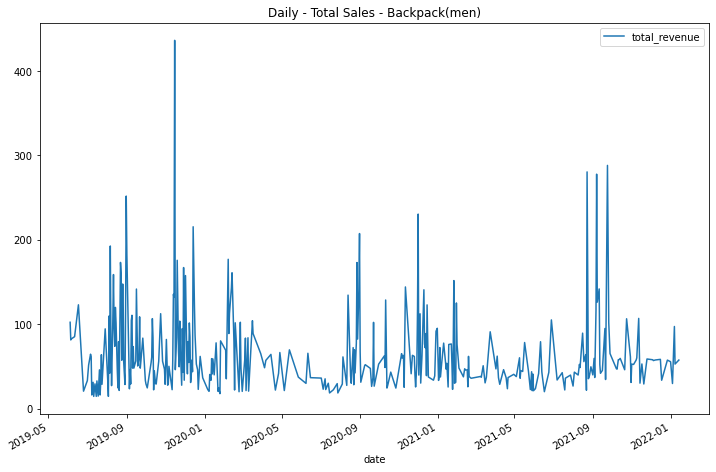

In [5]:
plt.rcParams["figure.figsize"] = (12, 8)
df.plot()
plt.title('Daily - Total Sales - Backpack-men(black))')
plt.show()

In [6]:
# Check for stationery 

from statsmodels.tsa.stattools import adfuller

X = df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

    
    


ADF Statistic: -5.002159
p-value: 0.000022
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


In [8]:
from pmdarima.arima.utils import ndiffs

ndiffs(df, test='adf')

# to select d#

0

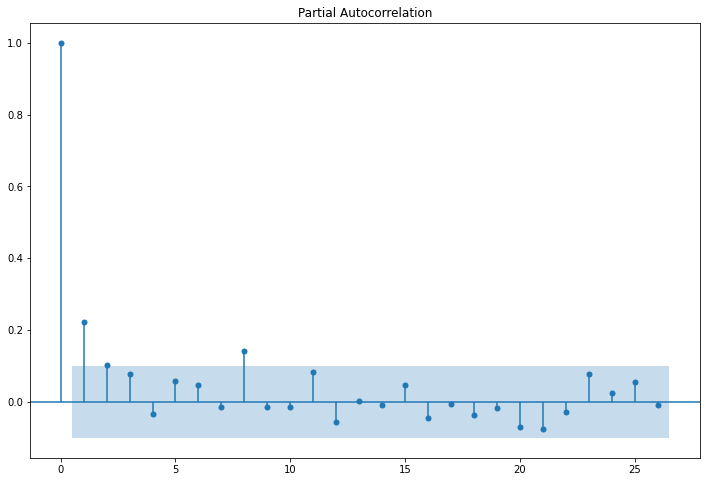

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df);

# to get the p#

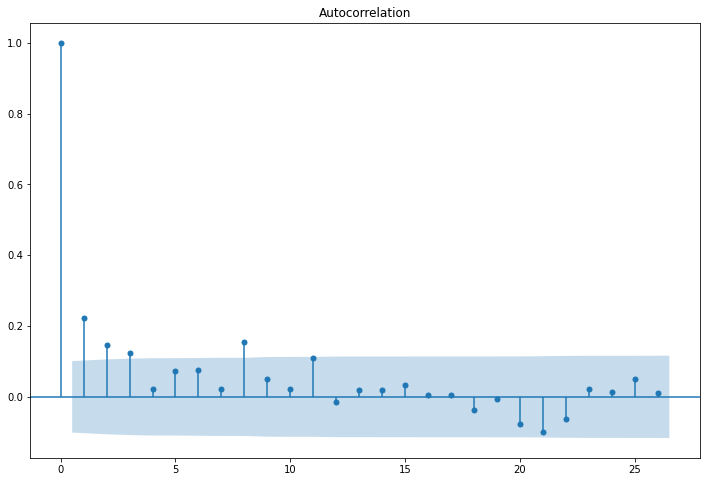

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df);

# to get the q#

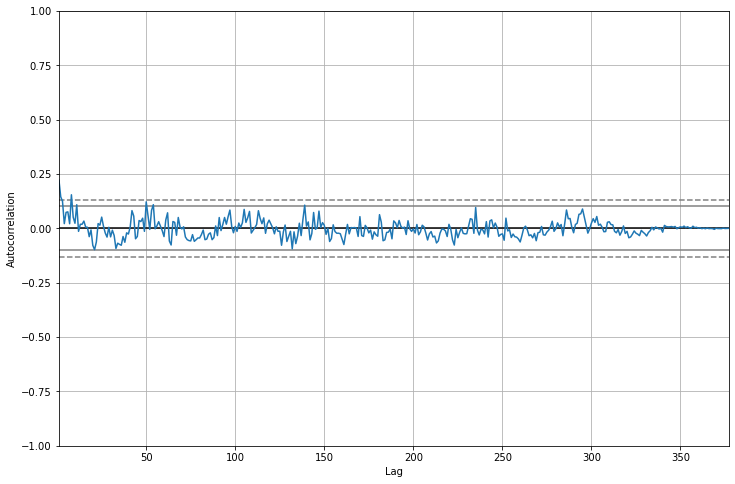

In [11]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(X)
plt.show()

In [7]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


model = ARIMA(X, order=(2,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  377
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1984.794
Date:                Thu, 17 Feb 2022   AIC                           3979.588
Time:                        22:49:29   BIC                           3999.249
Sample:                             0   HQIC                          3987.392
                                - 377                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.9130      6.558      9.898      0.000      52.060      77.766
ar.L1          0.9484      0.169      5.609      0.000       0.617       1.280
ar.L2         -0.0792      0.077     -1.028      0.3

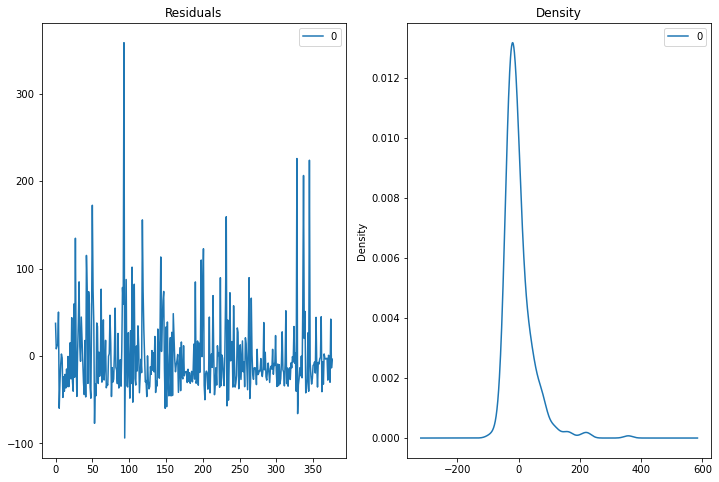

In [8]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [9]:
X = df.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2, 0, 1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)



C:\Users\Sujan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sujan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=63.880955, expected=151.664884
predicted=83.324408, expected=30.046899
predicted=65.829536, expected=31.226726
predicted=60.520817, expected=125.138047
predicted=76.743276, expected=76.194225
predicted=72.500728, expected=48.035465
predicted=66.333812, expected=37.642256
predicted=61.741869, expected=47.195058
predicted=61.352461, expected=45.869855
predicted=60.351543, expected=45.736279
predicted=59.752664, expected=25.824878
predicted=55.227383, expected=61.883209
predicted=60.837779, expected=38.018209
predicted=57.622160, expected=35.942581
predicted=56.255594, expected=38.080939
predicted=55.908119, expected=37.126404
predicted=55.339483, expected=50.794541
predicted=57.869463, expected=37.137054
predicted=55.872807, expected=30.486277
predicted=53.804902, expected=37.046014
predicted=54.166648, expected=90.999391
predicted=65.512753, expected=47.064215
predicted=60.679405, expected=62.162776
predicted=62.950840, expected=36.640326
predicted=58.299583, expected=28.78774

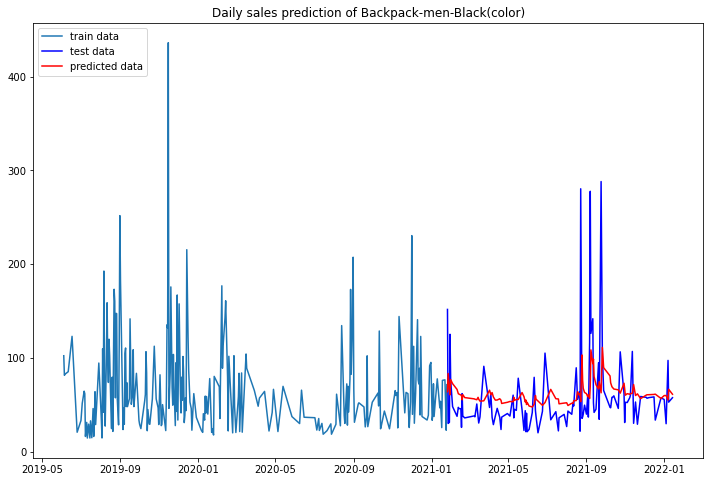

In [12]:
# plot forecasts against actual outcomes

plt.plot(df[:size].index, train, label='train data')
plt.plot(df[size:].index, test, color='blue', label='test data')
plt.plot(df[size:].index, predictions, color='red', label='predicted data')
plt.legend(loc="upper left")
plt.title('Daily sales prediction of Backpack-men-Black(color)')
plt.show()

In [11]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



mape=mean_absolute_percentage_error(test, predictions)
print('MAPE: ', mape)

MAPE:  57.3420737554348


In [22]:
forecast = model_fit.forecast(steps=30)


day=1
for yhat in forecast:
    print('Day {}: {}'.format(day,yhat))
    day = day + 1

Day 1: 61.18074239832814
Day 2: 62.337904706129166
Day 3: 62.769797601870906
Day 4: 63.08774983759118
Day 5: 63.354999071555
Day 6: 63.58319102323832
Day 7: 63.77836834984717
Day 8: 63.94533853800788
Day 9: 64.08818095869114
Day 10: 64.21038242146014
Day 11: 64.31492560207896
Day 12: 64.40436214924763
Day 13: 64.4808749924942
Day 14: 64.54633162480751
Day 15: 64.602329683854
Day 16: 64.65023594646118
Day 17: 64.69121968832776
Day 18: 64.72628122320805
Day 19: 64.75627631814504
Day 20: 64.78193708066874
Day 21: 64.8038898277656
Day 22: 64.82267037275732
Day 23: 64.83873710320476
Day 24: 64.85248216903669
Day 25: 64.86424105397862
Day 26: 64.87430076389691
Day 27: 64.88290683191613
Day 28: 64.89026931128711
Day 29: 64.89656790227744
Day 30: 64.90195633821926


In [16]:
# Hypertuning the parameters

import warnings
warnings.filterwarnings("ignore")

In [17]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.7)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
    
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
        
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [18]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    

In [19]:
# evaluate parameters
p_values = [1,2,3]
d_values = range(0, 2)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(df.values, p_values, d_values, q_values)


ARIMA(1, 0, 0) MSE=2031.357
ARIMA(1, 0, 1) MSE=2000.262
ARIMA(1, 0, 2) MSE=1998.008
ARIMA(1, 1, 0) MSE=2674.374
ARIMA(1, 1, 1) MSE=2044.381
ARIMA(1, 1, 2) MSE=2011.133
ARIMA(2, 0, 0) MSE=2009.577
ARIMA(2, 0, 1) MSE=1995.524
ARIMA(2, 0, 2) MSE=2022.207
ARIMA(2, 1, 0) MSE=2515.465
ARIMA(2, 1, 1) MSE=2009.636
ARIMA(2, 1, 2) MSE=2045.479
ARIMA(3, 0, 0) MSE=2027.071
ARIMA(3, 0, 1) MSE=2052.540
ARIMA(3, 0, 2) MSE=2101.705
ARIMA(3, 1, 0) MSE=2409.165
ARIMA(3, 1, 1) MSE=2049.080
ARIMA(3, 1, 2) MSE=2056.826
Best ARIMA(2, 0, 1) MSE=1995.524
